In [3]:
# Install required libraries by running this in your terminal:
# pip install requests pandas matplotlib scikit-learn

import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime

# --- Configuration (No API Key Needed!) ---
# Coordinates for Nashville, TN
LATITUDE = 36.17
LONGITUDE = -86.78

# --- Construct the API URL and Fetch Data ---
print("Fetching weather data from Open-Meteo...")

# The URL specifies coordinates, hourly data to get (temperature), and the unit.
url = (
    f"https://api.open-meteo.com/v1/forecast?"
    f"latitude={LATITUDE}&longitude={LONGITUDE}"
    f"&hourly=temperature_2m&temperature_unit=celsius&forecast_days=7"
)

response = requests.get(url)
data = response.json()

print("Successfully fetched forecast data.")

Fetching weather data from Open-Meteo...
Successfully fetched forecast data.


In [4]:
# --- Process the Data into a Pandas DataFrame ---
# Open-Meteo's JSON is well-structured for direct DataFrame conversion
hourly_data = data['hourly']
df = pd.DataFrame(hourly_data)

# Convert the 'time' column from text to a real datetime format
df['time'] = pd.to_datetime(df['time'])

# Rename column for clarity
df = df.rename(columns={'temperature_2m': 'temperature_celsius'})

print("\n--- Data Head ---")
print(df.head())


--- Data Head ---
                 time  temperature_celsius
0 2025-10-08 00:00:00                 23.6
1 2025-10-08 01:00:00                 22.6
2 2025-10-08 02:00:00                 21.9
3 2025-10-08 03:00:00                 21.5
4 2025-10-08 04:00:00                 21.1



Generating temperature forecast plot...


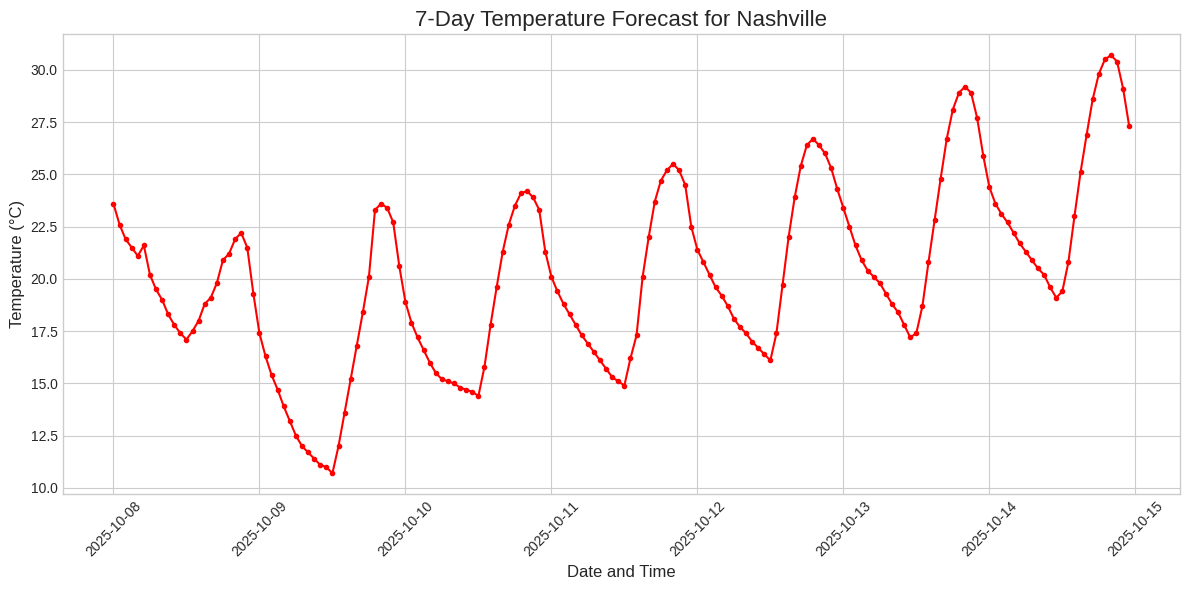

Plot displayed.


In [5]:
# --- Visualize the Data ---
print("\nGenerating temperature forecast plot...")
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df['time'], df['temperature_celsius'], marker='.', linestyle='-', color='r')

ax.set_title(f'7-Day Temperature Forecast for Nashville', fontsize=16)
ax.set_xlabel('Date and Time', fontsize=12)
ax.set_ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Plot displayed.")

In [7]:
# --- Predictive Modeling ---
print("\nTraining a simple predictive model...")

# Prepare data: convert time to a numerical format (Unix timestamp)
df['timestamp'] = df['time'].apply(lambda x: x.timestamp())
X = df[['timestamp']]
y = df['temperature_celsius']

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Predict the temperature 24 hours from the last forecast point
last_timestamp = df['timestamp'].iloc[-1]
future_timestamp = last_timestamp + (24 * 3600) # 24 hours in seconds

predicted_temp = model.predict([[future_timestamp]])
future_time = datetime.fromtimestamp(future_timestamp)

print("\n--- Prediction Result ---")
print(f"The model predicts the temperature at {future_time.strftime('%Y-%m-%d %H:%M')} will be: {predicted_temp[0]:.2f}°C")


Training a simple predictive model...

--- Prediction Result ---
The model predicts the temperature at 2025-10-15 23:00 will be: 25.30°C


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
